In [0]:
!pip install py-agender

In [0]:
from keras.models import load_model
import cv2
from skimage.io import imread
from pylab import *
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

In [33]:
face=cv2.imread("/content/test.jpg")
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']
age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')
#Predict Gender
blob = cv2.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
gender_net.setInput(blob)
gender_preds = gender_net.forward()
gender = gender_list[gender_preds[0].argmax()]
print("Gender : " + gender)
#Predict Age
age_net.setInput(blob)
age_preds = age_net.forward()
age = age_list[age_preds[0].argmax()]
print("Age Range: " + age)

Gender : Male
Age Range: (25, 32)


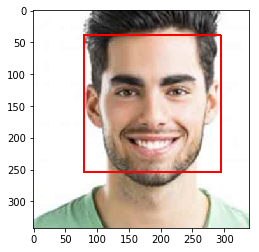

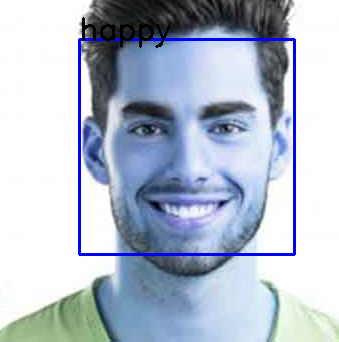

In [35]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = imread('test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

imshow(img)
plt.show()
cv2.waitKey()





detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48





from keras.models import model_from_json
model = model_from_json(open("facial_expression_model_structure.json", "r").read())
model.load_weights('facial_expression_model_weights.h5') #load weights




img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
 
img_pixels /= 255
 
predictions = model.predict(img_pixels)
 

max_index = np.argmax(predictions[0])
 
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
emotion = emotions[max_index]
cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (1,1,1), 2)
cv2.resize(img,(150,150))
cv2_imshow(img) 
